# Time Analysis prediction 

using the regrssion techniques can you predict the future of the <a href="../datasets/Financial Data - Forex.zip">stock</a> market based on the history of it ?

![Time analysis](https://magoosh.com/statistics/files/2018/05/time_series.png)

it would be great to predict one day in the future, one month and one year !

In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [63]:
df = pd.read_csv("../../datasets/EURUSD_15m_BID_01.01.2010-31.12.2016.csv")
df.head()

,Time,Open,High,Low,Close,Volume
0,2010-01-01 00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
1,2010-01-01 00:15,1.43285,1.43295,1.43229,1.43275,535600003.2
2,2010-01-01 00:30,1.43280,1.43303,1.43239,1.43281,436299999.2
3,2010-01-01 00:45,1.43285,1.43294,1.43229,1.43276,614299997.3
4,2010-01-01 01:00,1.43287,1.43292,1.43206,1.43282,705300008.8


In [64]:
df.iloc[0, 0]

'2010-01-01 00:00'

In [65]:
pd.to_datetime(df['Time'])[0]

Timestamp('2010-01-01 00:00:00')

In [66]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Time,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8


In [67]:
df['time_values'] = df.index.values
df.head()

,Open,High,Low,Close,Volume,time_values
Time,,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1,2010-01-01 00:00:00
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2,2010-01-01 00:15:00
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2,2010-01-01 00:30:00
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3,2010-01-01 00:45:00
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8,2010-01-01 01:00:00


In [68]:
df['days'] = df.time_values.apply(lambda x: x.day)
df.head()

,Open,High,Low,Close,Volume,time_values,days
Time,,,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1,2010-01-01 00:00:00,1
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2,2010-01-01 00:15:00,1
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2,2010-01-01 00:30:00,1
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3,2010-01-01 00:45:00,1
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8,2010-01-01 01:00:00,1


In [73]:
# test average prediction
df['avg'] = (df['High'] + df['Low'])/2
df['mov'] = df['Close'] - df['Open']

def trans(x):
    if x >=0 :
        return True
    else:
        return False
df['mov'] = df['mov'].apply(trans)

pred_col = 'avg'
df = df[[pred_col]]

df.head()

,Open,High,Low,Close,Volume,time_values,days,avg,mov
Time,,,,,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1,2010-01-01 00:00:00,1,1.432585,True
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2,2010-01-01 00:15:00,1,1.432620,False
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2,2010-01-01 00:30:00,1,1.432710,True
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3,2010-01-01 00:45:00,1,1.432615,False
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8,2010-01-01 01:00:00,1,1.432490,False


In [35]:
df.head()

,avg
Time,
2010-01-01 00:00:00,1.432585
2010-01-01 00:15:00,1.432620
2010-01-01 00:30:00,1.432710
2010-01-01 00:45:00,1.432615
2010-01-01 01:00:00,1.432490


# How many reads we have per day ?

In [36]:
day_reads = len(df['2011-1-1'])
day_reads

96

# that's what we aiming for

In [37]:
forecast_out = day_reads*7 # predicting 1 week into future
df['Prediction'] = df[[pred_col]].shift(-forecast_out)

In [38]:
df.tail()

,avg,Prediction
Time,,
2016-12-31 22:45:00,1.0515,NaN
2016-12-31 23:00:00,1.0515,NaN
2016-12-31 23:15:00,1.0515,NaN
2016-12-31 23:30:00,1.0515,NaN
2016-12-31 23:45:00,1.0515,NaN


In [39]:
X = np.array(df.drop('Prediction', 1))

In [40]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last forecast values
y_forecast = np.array(df[pred_col])[-forecast_out:]
X = X[:-forecast_out] # remove last forecast values from X

In [41]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9776081298456064


In [54]:
forecast_prediction = clf.predict(X_test)


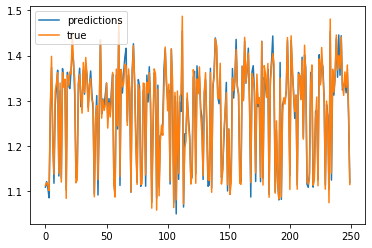

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
size = 250
plt.plot(forecast_prediction[:size], label='predictions');
plt.plot(y_test[:size], label='true');
plt.legend()
plt.show();

## Make it in one function   

In [59]:
def predict_ts(forecast_value):
    df['Prediction'] = df[[pred_col]].shift(-forecast_value)
    X = np.array(df.drop('Prediction', 1))
    X_forecast = X[-forecast_value:] # set X_forecast equal to last forecast values
    y_forecast = np.array(df[pred_col])[-forecast_value:]
    X = X[:-forecast_value] # remove last forecast values from X
    y = np.array(df['Prediction'])
    y = y[:-forecast_value]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    # Training
    clf = LinearRegression()
    clf.fit(X_train,y_train)
    # Testing
    confidence = clf.score(X_test, y_test)
    print("confidence: ", confidence)
    forecast_prediction = clf.predict(X_test)
    plt.plot(forecast_prediction[:100], label='predictions');
    plt.plot(y_test[:100], label='true');
    plt.legend()
    plt.show();

confidence:  0.9967095188920893


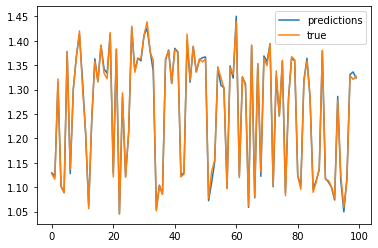

In [60]:
predict_ts(day_reads)

confidence:  0.17234930135233162


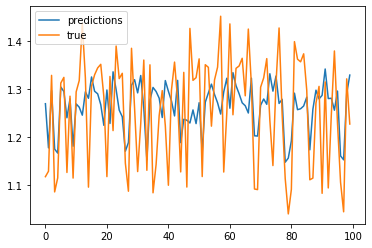

In [61]:
predict_ts(day_reads*365)